**Trabajo final "Curso de Deep Learning: Redes neuronales desde cero"**.

**Autor:** Hernan Hernandez

**Consigna:** Mediante el modelo de redes neuronales que el alumno considere pertinente, deberá
resolver el problema de clasificación de rostros de Labeled Faces in the Wild (LFW)

In [2]:
#cargamos las librerias

from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
#Cargamos el dataset

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
#Mostramos los nombres de las figuras

for nombres in lfw_people.target_names:
    print(nombres)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [4]:
#Analizamos las dimensiones de dataset

tipo = lfw_people.data.dtype

muestras =lfw_people.data.shape[0]

dimensiones= lfw_people.images.shape

n_classes = lfw_people.target_names.shape[0]

target = np.unique(lfw_people.target)

print("------------------------------------")
print("Caracteristicas del dataset")
print("------------------------------------")
print("Tipos de datos:", tipo)
print("Cantidad de muestras:",muestras)
print("Dimensiones:", dimensiones)
print("Cantidad de clases:",n_classes)
print("Valores de clases:",target)
print("------------------------------------")
print("                                    ")
print("------------------------------------")


------------------------------------
Caracteristicas del dataset
------------------------------------
Tipos de datos: float32
Cantidad de muestras: 1288
Dimensiones: (1288, 50, 37)
Cantidad de clases: 7
Valores de clases: [0 1 2 3 4 5 6]
------------------------------------
                                    
------------------------------------


In [6]:
# Algunas funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

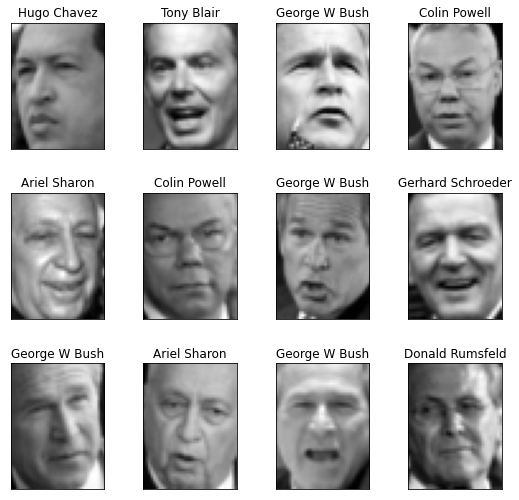

In [7]:
n_samples, h, w = lfw_people.images.shape

y = lfw_people.target

X = lfw_people.images


#Agrego una dimensión para que sea compatible con el modelo Keras
X = X.reshape(list(X.shape) + [1]) 


titles = [title(y[i], lfw_people.target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

## Dividimos el dataset en train y test

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y, random_state=123, test_size= 0.2)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1030, 50, 37, 1)
(258, 50, 37, 1)
(1030,)
(258,)


## Preprocesamiento

In [9]:
#Normalizamos el dataset de entrenamiento

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [10]:
#Aplicamos one-hot encoding a la variable target

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) 


### Instanciamos los parámetros del modelo

In [11]:
lr = 1.0
epochs = 50
batch_size = 50
k = 5
np.random.seed(14)

## Instanciamos el modelo convolucional

In [12]:
# Importamos las librerias

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.metrics import MSE
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers.legacy import Adadelta
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [13]:
# Model
#---------------------------------------------------------------------#
input_layer = Input(shape=X_train.shape[1:])
conv_1 = Conv2D(32, (3, 3),activation='relu') (input_layer)
conv_2 = Conv2D(64, (3, 3), activation='relu') (conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
dropout_1 = Dropout(0.25) (pool_1)
flatten_1 = Flatten() (dropout_1)
dense_1 = Dense(100, activation='relu') (flatten_1)
dropout_2 = Dropout(0.25) (dense_1)
output_layer = Dense(n_classes, activation='softmax') (dropout_2)
#---------------------------------------------------------------------#
model_conv = Model(input_layer, output_layer)

### Instanciamos el optimizador

In [14]:
#Sumamos el recall como métrica de bondad del modelo

Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model_conv.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse',Recall()])
model_conv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 37, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 35, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 33, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 16, 64)        0         
                                                                 
 flatten (Flatten)           (None, 23552)             0         
                                                             

## Entrenamos el modelo

In [15]:
start_time = time.time()
history_conv = model_conv.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True, verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/50
21/21 [==============================] - 11s 469ms/step - loss: 1.7632 - acc: 0.3786 - mse: 0.1132 - recall: 0.0456 - val_loss: 1.6867 - val_acc: 0.4070 - val_mse: 0.1085 - val_recall: 0.1124
Epoch 2/50
21/21 [==============================] - 9s 422ms/step - loss: 1.7011 - acc: 0.4126 - mse: 0.1096 - recall: 0.0534 - val_loss: 1.6653 - val_acc: 0.4070 - val_mse: 0.1075 - val_recall: 0.0039
Epoch 3/50
21/21 [==============================] - 7s 331ms/step - loss: 1.6850 - acc: 0.4126 - mse: 0.1088 - recall: 0.0689 - val_loss: 1.6652 - val_acc: 0.4070 - val_mse: 0.1076 - val_recall: 0.0000e+00
Epoch 4/50
21/21 [==============================] - 6s 304ms/step - loss: 1.6641 - acc: 0.4117 - mse: 0.1075 - recall: 0.0806 - val_loss: 1.6477 - val_acc: 0.4070 - val_mse: 0.1055 - val_recall: 0.1163
Epoch 5/50
21/21 [==============================] - 7s 315ms/step - loss: 1.6575 - acc: 0.4136 - mse: 0.1071 - recall: 0.1155 - val_loss: 1.6648 - val_acc: 0.4496 - val_mse: 0.1081 - val_

## Graficos

### Accuracy

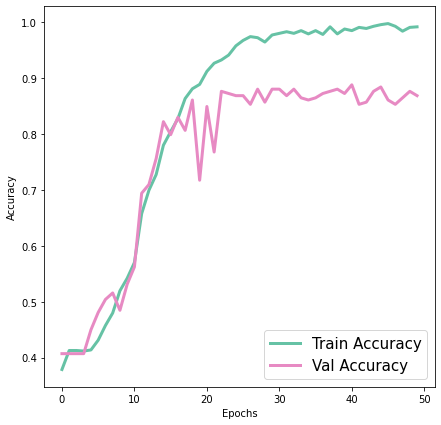

In [16]:
f = plt.figure(figsize=(7,7))
plt.plot(history_conv.history['acc'], linewidth=3, label='Train Accuracy', color= "#66c2a5")
plt.plot(history_conv.history['val_acc'], linewidth=3, label='Val Accuracy', color= "#e78ac3")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best', fontsize=15)
plt.show()

### Recall

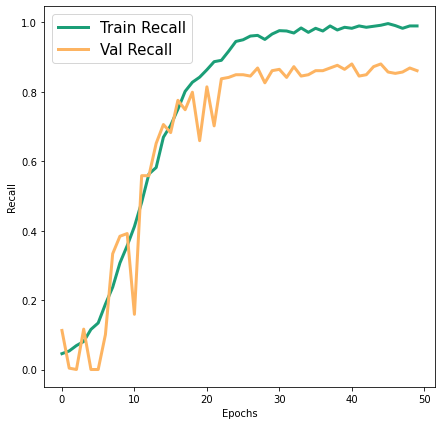

In [17]:
f = plt.figure(figsize=(7,7))
plt.plot(history_conv.history['recall'], linewidth=3, label='Train Recall', color= "#1b9e77")
plt.plot(history_conv.history['val_recall'], linewidth=3, label='Val Recall',color="#fdb462")
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(loc='best', fontsize=15)
plt.show()

### Observaciones

  - Incorporé el **Recall** como métrica para evaluar el ajuste, ya que además de considerar *que tan bien* clasifica el modelo (mendiante el accuracy), es importante poder determinar que tan sensible es nuestro modelo para clasificar los casos o verdaderos positivos. Este punto es muy importante en ciertos modelos de negocios como por ejemplo fraude.
  - Tanto el **accuracy** como el **recall** se estabiliza en torno al 80% a partir de la epochs 20. Esto da cuenta de un buen ajuste del modelo.

### Utilizamos K-folds como método de cross-validation

In [19]:
from sklearn.model_selection import KFold

start_time = time.time()

acc = np.zeros((k, epochs)) #Calculo el accuracy
recall = np.zeros((k, epochs)) #Calculo el recall

kfolds = KFold(n_splits=k, shuffle=True, random_state=None)

for i, (train_index, test_index) in enumerate(kfolds.split(X)):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#Aplico preprocesamiento    

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    y_train = to_categorical(y_train, n_classes)
    y_test = to_categorical(y_test, n_classes)
       
    
    history_fold = model_conv.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
    
    acc[i,:] = np.array(history_fold.history['val_acc'])
    recall[i,:] = np.array(history_fold.history['val_recall'])
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/50
21/21 [==============================] - 10s 465ms/step - loss: 0.2149 - acc: 0.9447 - mse: 0.0118 - recall: 0.9369 - val_loss: 0.1136 - val_acc: 0.9767 - val_mse: 0.0064 - val_recall: 0.9729
Epoch 2/50
21/21 [==============================] - 7s 319ms/step - loss: 0.0896 - acc: 0.9738 - mse: 0.0061 - recall: 0.9670 - val_loss: 0.1062 - val_acc: 0.9767 - val_mse: 0.0061 - val_recall: 0.9729
Epoch 3/50
21/21 [==============================] - 7s 321ms/step - loss: 0.0849 - acc: 0.9670 - mse: 0.0064 - recall: 0.9641 - val_loss: 0.1115 - val_acc: 0.9767 - val_mse: 0.0058 - val_recall: 0.9767
Epoch 4/50
21/21 [==============================] - 7s 317ms/step - loss: 0.0655 - acc: 0.9777 - mse: 0.0047 - recall: 0.9757 - val_loss: 0.0736 - val_acc: 0.9845 - val_mse: 0.0036 - val_recall: 0.9845
Epoch 5/50
21/21 [==============================] - 7s 316ms/step - loss: 0.0600 - acc: 0.9777 - mse: 0.0044 - recall: 0.9728 - val_loss: 0.0627 - val_acc: 0.9806 - val_mse: 0.0040 - val_reca

Epoch 30/50
21/21 [==============================] - 7s 313ms/step - loss: 0.0189 - acc: 0.9932 - mse: 0.0015 - recall: 0.9922 - val_loss: 0.0155 - val_acc: 0.9961 - val_mse: 0.0013 - val_recall: 0.9922
Epoch 31/50
21/21 [==============================] - 6s 296ms/step - loss: 0.0068 - acc: 0.9981 - mse: 5.0828e-04 - recall: 0.9981 - val_loss: 1.5940e-04 - val_acc: 1.0000 - val_mse: 2.6250e-07 - val_recall: 1.0000
Epoch 32/50
21/21 [==============================] - 8s 368ms/step - loss: 0.0091 - acc: 0.9971 - mse: 6.4900e-04 - recall: 0.9971 - val_loss: 1.4328e-04 - val_acc: 1.0000 - val_mse: 1.4907e-07 - val_recall: 1.0000
Epoch 33/50
21/21 [==============================] - 7s 310ms/step - loss: 0.0070 - acc: 0.9971 - mse: 5.2679e-04 - recall: 0.9971 - val_loss: 2.0139e-04 - val_acc: 1.0000 - val_mse: 8.9916e-07 - val_recall: 1.0000
Epoch 34/50
21/21 [==============================] - 6s 306ms/step - loss: 0.0150 - acc: 0.9951 - mse: 0.0011 - recall: 0.9951 - val_loss: 8.9881e-04 - 

21/21 [==============================] - 9s 423ms/step - loss: 0.0021 - acc: 1.0000 - mse: 7.2005e-05 - recall: 1.0000 - val_loss: 3.0988e-06 - val_acc: 1.0000 - val_mse: 9.7654e-11 - val_recall: 1.0000
Epoch 7/50
21/21 [==============================] - 7s 361ms/step - loss: 0.0053 - acc: 0.9981 - mse: 4.2107e-04 - recall: 0.9981 - val_loss: 3.9938e-06 - val_acc: 1.0000 - val_mse: 1.8739e-10 - val_recall: 1.0000
Epoch 8/50
21/21 [==============================] - 9s 415ms/step - loss: 0.0037 - acc: 0.9990 - mse: 2.3770e-04 - recall: 0.9990 - val_loss: 1.9796e-06 - val_acc: 1.0000 - val_mse: 2.8506e-11 - val_recall: 1.0000
Epoch 9/50
21/21 [==============================] - 8s 377ms/step - loss: 0.0011 - acc: 1.0000 - mse: 3.1592e-05 - recall: 1.0000 - val_loss: 2.3757e-06 - val_acc: 1.0000 - val_mse: 5.7828e-11 - val_recall: 1.0000
Epoch 10/50
21/21 [==============================] - 9s 445ms/step - loss: 0.0049 - acc: 0.9990 - mse: 3.3626e-04 - recall: 0.9990 - val_loss: 5.2034e-06 -

21/21 [==============================] - 7s 318ms/step - loss: 0.0022 - acc: 1.0000 - mse: 1.3053e-04 - recall: 1.0000 - val_loss: 8.2994e-06 - val_acc: 1.0000 - val_mse: 1.9843e-09 - val_recall: 1.0000
Epoch 33/50
21/21 [==============================] - 5s 254ms/step - loss: 0.0042 - acc: 0.9971 - mse: 3.8356e-04 - recall: 0.9971 - val_loss: 4.2069e-05 - val_acc: 1.0000 - val_mse: 4.2916e-08 - val_recall: 1.0000
Epoch 34/50
21/21 [==============================] - 6s 271ms/step - loss: 0.0011 - acc: 1.0000 - mse: 3.5059e-05 - recall: 1.0000 - val_loss: 4.7637e-06 - val_acc: 1.0000 - val_mse: 3.0968e-10 - val_recall: 1.0000
Epoch 35/50
21/21 [==============================] - 7s 310ms/step - loss: 0.0045 - acc: 0.9990 - mse: 3.8089e-04 - recall: 0.9990 - val_loss: 1.9574e-06 - val_acc: 1.0000 - val_mse: 5.0226e-11 - val_recall: 1.0000
Epoch 36/50
21/21 [==============================] - 5s 241ms/step - loss: 0.0051 - acc: 0.9981 - mse: 4.4227e-04 - recall: 0.9981 - val_loss: 7.3881e-0

In [27]:
#Guardamos el promedio y el desvio de las métricas
acc_mean = np.mean(acc, axis=0)
acc_std = np.std(acc, axis=0)
rec_mean = np.mean(recall,axis=0)
rec_std = np.std(recall, axis=0)


## Graficamos el accuracy

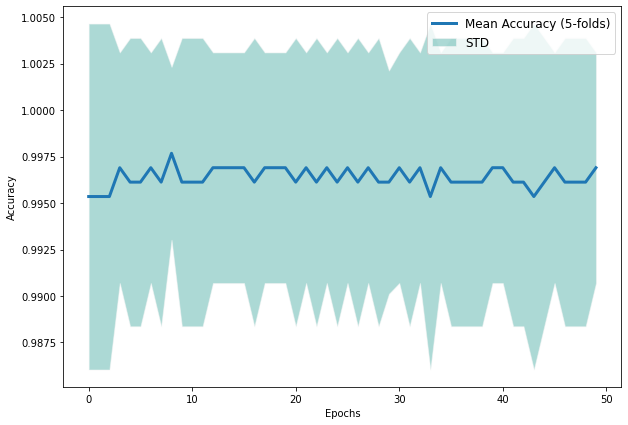

In [32]:
f = plt.figure(figsize=(10,7))
plt.plot(range(epochs),acc_mean, linewidth=3, label='Mean Accuracy (5-folds)')
plt.fill_between(range(epochs), acc_mean - acc_std,  acc_mean + acc_std, alpha=0.5, edgecolor='#f5f5f5', facecolor='#5ab4ac', label='STD')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best', fontsize=12)
plt.show()

## Graficamos el recall

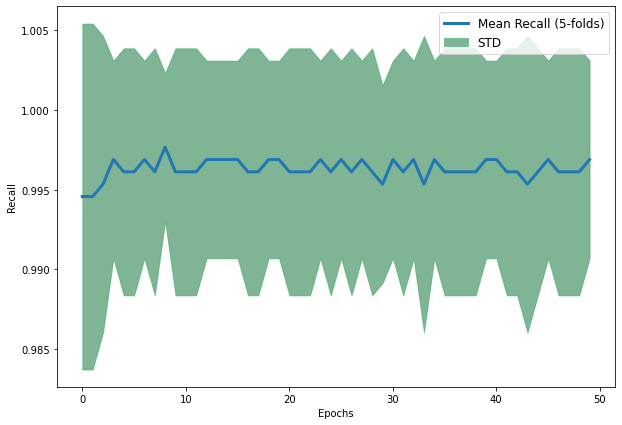

In [33]:
f = plt.figure(figsize=(10,7))
plt.plot(range(epochs),rec_mean, linewidth=3, label='Mean Recall (5-folds)')
plt.fill_between(range(epochs), rec_mean - rec_std,  rec_mean + rec_std, alpha=0.5, edgecolor='#2ca25f', facecolor='#006d2c', label='STD')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(loc='best', fontsize=12)
plt.show()

### Observaciones
   - Mediante la estrategia de K-folds obtenemos mejores métricas de **accuracy** y **recall**, que se mantienen en torno al 99%.

In [34]:
#Guardamos el modelo entrenado
model_conv.save("model_conv.h5")

## Probamos predecir con nuestro modelo entrenado

### Cargamos el modelo

In [1]:
import tensorflow as tf
from tensorflow import keras

load_model = keras.models.load_model('model_conv.h5')

In [11]:
#Creamos objeto de test para predcir

image = X[11].astype('float32') / 255.0

#Armonizamos las dimensiones para compatibilizarlas con el input del modelo
image = image.reshape(1,50,37,1)

#Calculamos la probabilidad
y_prob = load_model.predict(image)


print("-----------------------------")
print("--------Probabilidad---------")
print(y_prob)
print("-----------------------------")

#Guardamos el índice con el mayor valor de probabilidad
y_class = y_prob.argmax(axis=-1)

#Obtenemos el nombre de la imagen predicha (clase)

print("                             ")
print("-----------Clase-------------")
print("-----",lfw_people.target_names[y_class],"----")
print("-----------------------------")

1/1 [==============================] - 0s 29ms/step
-----------------------------
--------Probabilidad---------
[[2.4571791e-14 1.6171355e-10 1.0000000e+00 2.9084809e-11 1.0856140e-15
  7.7218888e-24 1.8645347e-17]]
-----------------------------
                             
-----------Clase-------------
----- ['Donald Rumsfeld'] ----
-----------------------------


### Graficamos la matriz de confusión

In [89]:
#Importamos la libreria

from sklearn.metrics import confusion_matrix

#Creamos el vector de valores predichos

y_predicha = load_model.predict(X_test)

y_predicha = np.argmax(y_predicha,axis=1)

y_true = y_test

CM = confusion_matrix(y_true, y_predicha)


9/9 [==============================] - 0s 34ms/step


In [99]:
#Armo un vector con etiquetas

etiquetas = lfw_people.target_names[0:7,]

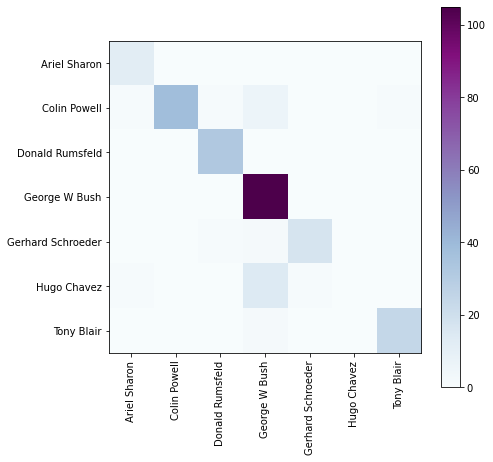

In [103]:
#Graficamos la matriz de confusión

f = plt.figure(figsize=(7,7))
plt.imshow(CM, cmap='BuPu')
plt.xticks(np.arange(7), etiquetas,rotation=90)  # Set text labels and properties.
plt.yticks(np.arange(7), etiquetas,rotation=0)  # Set text labels and properties.
plt.colorbar()
plt.show()